# 📊 Capstone Project: IoT + AI: Smart Home Device Classifier
> Classifying smart home devices based on their features using Machine Learning.

### 1. Problem Definition
#### **Objective:**
*To build a machine learning model that can classify IoT smart home devices into their respective categories based on their usage patterns & features.*

#### **Why?**
*Smart homes consist of various IoT devices. An intelligent classification system helps in optimizing device management, energy consumption, and security.*

### 2. Importing Required Libraries

In [193]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### 3. Data Collection

In [194]:
df = pd.read_csv("iot_device_classification_dataset_1000.csv")
df.head()

,power_usage_watts,daily_active_hours,network_packets_per_sec,avg_latency_ms,temperature_C,humidity_%,voltage_V,firmware_version,device_category
0,0.899531,25.030866,24.738608,11.842251,21.166346,49.379264,209.945186,8,Motion Sensor
1,2.014393,0.034762,16.641648,11.165476,24.235989,52.311891,227.693575,9,Door Lock
2,5.121788,13.206882,47.489560,19.180664,22.047341,47.434905,219.877724,5,Light Bulb
3,80.711103,3.949754,519.127713,89.866402,32.238847,38.895963,224.494511,8,Smart TV
4,79.541099,5.778698,487.348809,105.459961,35.556626,40.968199,231.093192,8,Smart TV


### 4. Exploratory Data Analysis (EDA)

In [195]:
df.describe()

,power_usage_watts,daily_active_hours,network_packets_per_sec,avg_latency_ms,temperature_C,humidity_%,voltage_V,firmware_version
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,13.243112,14.969918,101.182159,38.889213,24.968357,46.743955,221.890920,5.169000
std,21.643092,9.129541,138.373020,46.360821,2.965448,8.285721,6.369080,2.521666
min,-5.091858,-3.341723,-26.010851,-8.483110,18.039699,18.518735,203.179522,1.000000
25%,2.032774,6.006159,16.663712,6.583048,22.819728,40.921760,217.304778,3.000000
50%,5.263042,16.406336,38.265983,15.459565,24.650902,47.066891,221.665284,5.000000
75%,14.758395,23.465664,145.727829,58.163517,26.741781,52.604878,225.591177,7.000000
max,83.209015,31.852475,519.353203,160.836230,35.556626,68.463791,243.254942,9.000000


In [196]:
# Columns that must be >= 0
columns_to_check = [
    'power_usage_watts',
    'daily_active_hours',
    'network_packets_per_sec',
    'avg_latency_ms'
]

# Keep only rows where all these columns are >= 0
final_df = df[(df[columns_to_check] >= 1).all(axis=1)]

print(f"Original rows: {len(df)}, Cleaned rows: {len(final_df)}")
df = final_df.copy()
df.describe()

Original rows: 1000, Cleaned rows: 717


,power_usage_watts,daily_active_hours,network_packets_per_sec,avg_latency_ms,temperature_C,humidity_%,voltage_V,firmware_version
count,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000
mean,17.972567,13.955161,135.010729,51.939691,25.457539,45.535993,222.529706,5.175732
std,23.747703,8.221511,149.242394,48.641570,3.122109,8.622099,6.752723,2.548923
min,1.037330,1.015462,1.015853,1.142954,18.039699,18.518735,203.179522,1.000000
25%,4.201113,6.191256,28.616174,11.489605,23.125995,39.018251,217.675883,3.000000
50%,9.366287,13.111177,84.131883,39.823799,25.224762,45.413987,222.338974,5.000000
75%,17.978090,22.198706,182.906903,89.548486,27.557189,51.658655,226.555837,7.000000
max,83.209015,31.852475,519.353203,160.836230,35.556626,68.073995,243.254942,9.000000


In [197]:
df.isna().sum()

power_usage_watts          0
daily_active_hours         0
network_packets_per_sec    0
avg_latency_ms             0
temperature_C              0
humidity_%                 0
voltage_V                  0
firmware_version           0
device_category            0
dtype: int64

In [198]:
df.device_category.unique()

array(['Light Bulb', 'Smart TV', 'Motion Sensor', 'Water Leak Sensor',
       'Door Lock', 'Smart Speaker', 'Security Camera', 'Smart Plug',
       'Smoke Detector', 'Thermostat'], dtype=object)

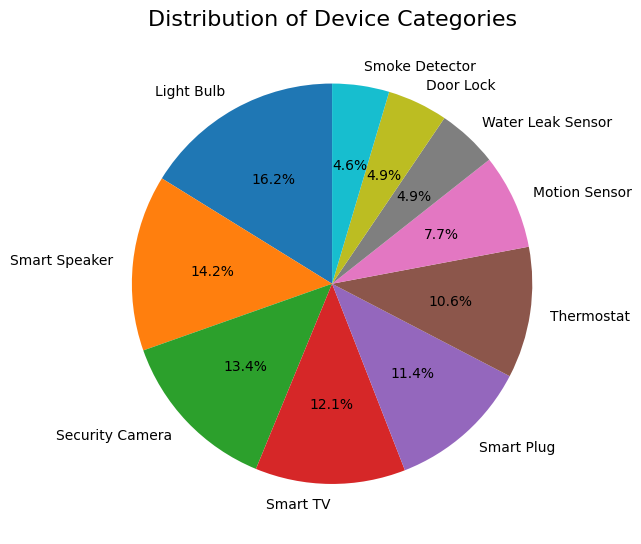

In [199]:
category_counts = df['device_category'].value_counts()

plt.figure(figsize=(6.5,6.5))
category_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='tab10')

plt.title("Distribution of Device Categories", fontsize = 16)
plt.ylabel("")
plt.show()

In [200]:
# Encode target variables
label_encoder = LabelEncoder()
df['device_category_encoded']=label_encoder.fit_transform(df['device_category'])
print("Target classes: ", list(label_encoder.classes_))

Target classes:  ['Door Lock', 'Light Bulb', 'Motion Sensor', 'Security Camera', 'Smart Plug', 'Smart Speaker', 'Smart TV', 'Smoke Detector', 'Thermostat', 'Water Leak Sensor']


### 5. Splitting DataSet into train/test data

In [201]:
# Define independent, dependent features and splitting of dataset
X = df.drop(columns=['device_category','device_category_encoded'])
y = df['device_category_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(X_train.count())

power_usage_watts          573
daily_active_hours         573
network_packets_per_sec    573
avg_latency_ms             573
temperature_C              573
humidity_%                 573
voltage_V                  573
firmware_version           573
dtype: int64


In [202]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 6. Model Selection and Training

In [203]:
acc_results = {}

# ----- Logistic Regression -----
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

print("Logistic Regression Results:")
accuracy = accuracy_score(y_test, y_pred_lr)
acc_results['LogisticRegression'] = accuracy
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

# ----- Decision Tree Classifier -----
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)

print("Decision Tree Results:")
accuracy = accuracy_score(y_test, y_pred_dtc)
acc_results['DecisionTreeClassifier'] = accuracy
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dtc))
print("Classification Report:\n", classification_report(y_test, y_pred_dtc))

# ----- Random Forest Classifier -----
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

print("Random Forest Results:")
accuracy = accuracy_score(y_test, y_pred_rfc)
acc_results['RandomForestClassifier'] = accuracy
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rfc))
print("Classification Report:\n", classification_report(y_test, y_pred_rfc))

# ----- K-Nearest Neighbours -----
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

print("K-Nearest Neighbour Results:")
accuracy = accuracy_score(y_test, y_pred_knn)
acc_results['KNN'] = accuracy
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

Logistic Regression Results:
Accuracy: 0.875
Confusion Matrix:
 [[ 4  0  0  0  3  0  0  0  0  0]
 [ 0 23  0  0  0  0  0  0  0  0]
 [ 0  1  8  0  0  0  0  1  0  1]
 [ 0  0  0 18  0  1  0  0  0  0]
 [ 0  0  0  0 16  0  0  0  0  0]
 [ 0  1  0  0  0 20  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0]
 [ 0  0  6  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0 15  0]
 [ 0  0  3  0  0  0  0  1  0  3]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.57      0.73         7
           1       0.92      1.00      0.96        23
           2       0.47      0.73      0.57        11
           3       1.00      0.95      0.97        19
           4       0.84      1.00      0.91        16
           5       0.95      0.95      0.95        21
           6       1.00      1.00      1.00        18
           7       0.33      0.14      0.20         7
           8       1.00      1.00      1.00        15
           9       0.75      0.43      0

### 7. Model Evaluation

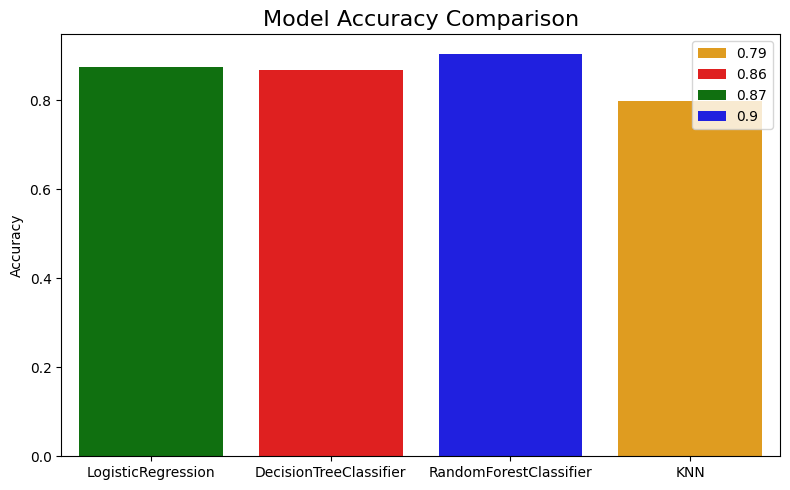

In [204]:
plt.figure(figsize=(8, 5))
sns.barplot(x=list(acc_results.keys()), y=list(acc_results.values()), palette=['orange', 'red', 'green', 'blue'], hue=[0.87, 0.86, 0.90, 0.79])
plt.title("Model Accuracy Comparison", fontsize=16)
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()

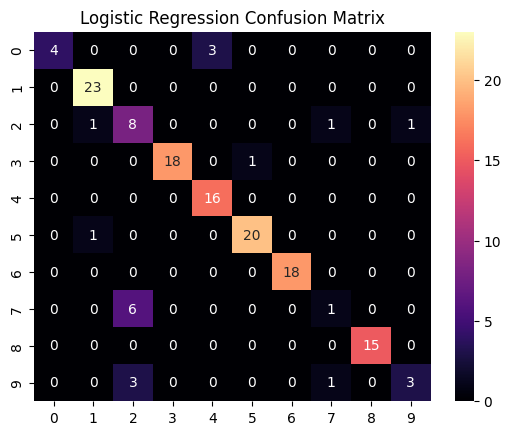

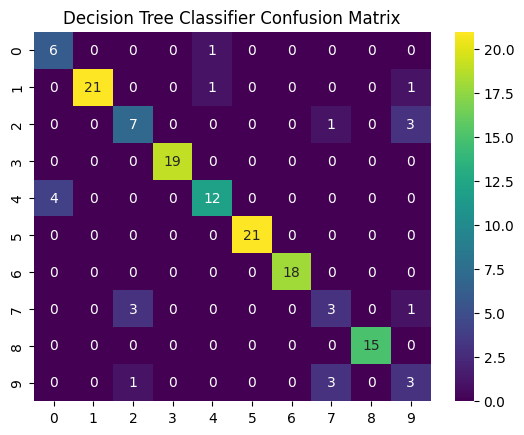

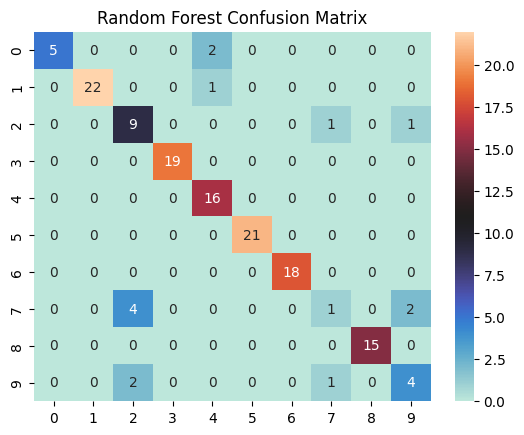

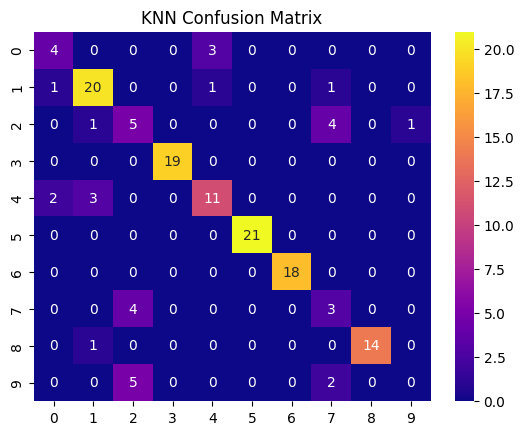

In [205]:
# Logistic Regression Confusion Matrix Heatmap
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='magma')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

# Decision Tree Classifier Confusion Matrix Heatmap
sns.heatmap(confusion_matrix(y_test, y_pred_dtc), annot=True, fmt='d', cmap='viridis')
plt.title('Decision Tree Classifier Confusion Matrix')
plt.show()

# Random Forest Confusion Matrix Heatmap
sns.heatmap(confusion_matrix(y_test, y_pred_rfc), annot=True, fmt='d', cmap='icefire')
plt.title('Random Forest Confusion Matrix')
plt.show()

# KNN Confusion Matrix Heatmap
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='plasma')
plt.title('KNN Confusion Matrix')
plt.show()

## Random Forest is a best model with 90% Accuracy

### 8. Prediction on new data

In [206]:
new_data = pd.DataFrame({
    'power_usage_watts':[12.53],
    'daily_active_hours':[16.24],
    'network_packets_per_sec':[60.32],
    'avg_latency_ms':[12.40],
    'temperature_C':[24.03],
    'humidity_%':[46.33],
    'voltage_V':[216.46],
    'firmware_version':[9]
})

new_data_scaled = scaler.transform(new_data)

# Prediction on new data with Logistic Regression
lr_prediction = lr.predict(new_data_scaled)
print("\nLogistic Regression Prediction for New Data:")
print("Predicted Result :", lr_prediction[0])

# Prediction on new data with Decision Tree Classifier
dtc_prediction = dtc.predict(new_data)
print("\nDecision Tree Prediction for New Data:")
print("Predicted Result :", dtc_prediction[0])

# Prediction on new data with random forest
rfc_prediction = rfc.predict(new_data)
print("\nRandom Forest Prediction for New Data:")
print("Predicted Result :", rfc_prediction[0])

# Prediction on new data with KNN
knn_prediction = knn.predict(new_data_scaled)
print("\nKNN Prediction for New Data:")
print("Predicted Result :", knn_prediction[0])

print("\nReadable Prediction (using label encoder):")
print("Logisitic Regression result:", label_encoder.inverse_transform(lr_prediction)[0], "(CORRECT)")
print("Decision Tree result:", label_encoder.inverse_transform(dtc_prediction)[0], "(CORRECT)")
print("Random Forest result:", label_encoder.inverse_transform(rfc_prediction)[0], "(CORRECT)")
print("K-Nearest Neighbour result:", label_encoder.inverse_transform(knn_prediction)[0], "(INCORRECT)")


Logistic Regression Prediction for New Data:
Predicted Result : 1

Decision Tree Prediction for New Data:
Predicted Result : 1

Random Forest Prediction for New Data:
Predicted Result : 1

KNN Prediction for New Data:
Predicted Result : 7

Readable Prediction (using label encoder):
Logisitic Regression result: Light Bulb (CORRECT)
Decision Tree result: Light Bulb (CORRECT)
Random Forest result: Light Bulb (CORRECT)
K-Nearest Neighbour result: Smoke Detector (INCORRECT)
